# Objective

In this lab, we will explore building a KNN model with the iris dataset. 

You will have more freedom in this lab to experiment with feature/attribute manipulation, model design, and data visualization.


# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier as KNC
from sklearn.model_selection import cross_validate

# Obtain Data

In [4]:
from sklearn.datasets import load_iris

In [5]:
iris = load_iris()

In [6]:
X = pd.DataFrame(iris.data)
Y = pd.DataFrame(iris.target)

In [7]:
X.columns = iris.feature_names

In [8]:
f1 = iris.feature_names[0]
f2 = iris.feature_names[1]
f3 = iris.feature_names[2]
f4 = iris.feature_names[3]

In [9]:
f1, f2, f3, f4

('sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)')

In [10]:
Y

,0
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


*   0 is Iris Setosa
*   1 is Iris Versicolor
*   2 is Iris Virginica



# Visualize Data

Select an attribute pair. Create a scatterplot of the relationship between the two attributes. 

Hint: You can visualize all the pairs using subplots (f1 and f2, f1 and f3, f1 and f4, f2 and f3, f2 and f4, and f3 and f4) and then select the pair that has the best clear boundaries for each cluster for the rest of the assignment. 

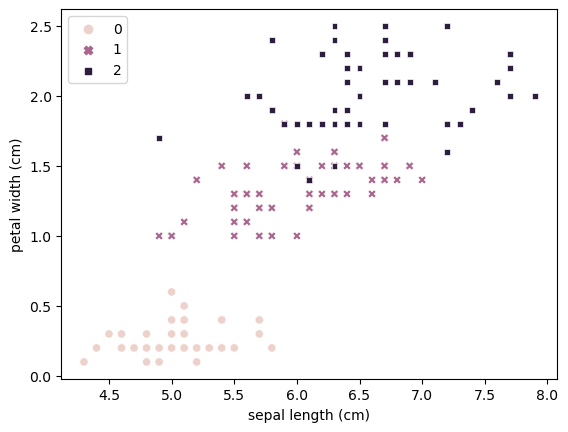

In [35]:
sns.scatterplot( data = X , x = f1, y = f4 , style = iris.target, hue =iris.target)
plt.show()

# Creating training and testing datasets

Using scikit-learn's built-in function, create the training and testing datasets from the iris dataset. Since we will be training over 2 attributes only (you choose a pair), be sure that the datasets reflect this. That is, when you print out X_train, it should have 2 columns.

In [36]:
f1= 'sepal length (cm)'
f4 = 'petal width (cm)'

X_train, X_test, y_train, y_test = train_test_split(X[[f1, f3]], Y, test_size=0.3, random_state=1)

In [37]:
X_train.head(2)

,sepal length (cm),petal length (cm)
118,7.7,6.9
18,5.7,1.7


# Creating and training model

Create a KNN model and find the best number of neighbors (K) that will maximize accuracy. You can use the techniques discussed in class or experiment with your own ideas. 

You can incorporate scaling and/or any attribute manipulation you wish to improve the accuracy. You can check out Lab 7 on how to use minmax scaling. 

Be sure to show your work to justify the decisions you make for your model.



In [43]:
from sklearn.preprocessing import MinMaxScaler
MMS = MinMaxScaler()
X_train_scaled = MMS.fit_transform(X_train)
X_test_scaled = MMS.transform(X_test)

In [48]:
num_neighbors = [1,3,5,7, 9, 11]
for k in num_neighbors:
    model = KNC(n_neighbors= k )
    model.fit(X_train, y_train)
    
    y_predicted = model.predict(X_test)
    accuracy = model.score(X_test, y_test)
    print("k={}, accuracy={}".format(k,accuracy))

k=1, accuracy=0.9111111111111111
k=3, accuracy=0.9333333333333333
k=5, accuracy=0.9555555555555556
k=7, accuracy=0.9777777777777777
k=9, accuracy=0.9777777777777777
k=11, accuracy=0.9777777777777777


/opt/conda/envs/GS-3.8/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/conda/envs/GS-3.8/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/conda/envs/GS-3.8/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/conda/envs/GS-3.8/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

In [50]:
model.score(X_test, y_test)

0.9777777777777777

In [51]:
i=2
cv_results = cross_validate( model, X_train, y_train, cv=i )
print(cv_results[ 'test_score' ], np.mean(cv_results[ 'test_score' ]))

[0.94339623 0.84615385] 0.8947750362844702


/opt/conda/envs/GS-3.8/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/conda/envs/GS-3.8/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [53]:
num_folds = [5, 10, 15, 20]
for i in num_folds:
    cv_results = cross_validate( model, X_train, y_train, cv=i )
    print(cv_results[ 'test_score' ], np.mean(cv_results[ 'test_score' ]))

/opt/conda/envs/GS-3.8/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/conda/envs/GS-3.8/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/conda/envs/GS-3.8/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/conda/envs/GS-3.8/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

[0.95238095 0.95238095 0.9047619  0.9047619  0.9047619 ] 0.9238095238095237
[1.         0.90909091 1.         0.90909091 0.90909091 0.8
 1.         0.9        1.         0.9       ] 0.9327272727272728


/opt/conda/envs/GS-3.8/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/conda/envs/GS-3.8/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/conda/envs/GS-3.8/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/conda/envs/GS-3.8/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

[1.         0.85714286 1.         1.         0.85714286 1.
 1.         1.         0.71428571 0.85714286 1.         0.85714286
 1.         1.         0.85714286] 0.9333333333333335
[1.         1.         0.83333333 1.         0.83333333 1.
 0.8        1.         1.         1.         1.         0.8
 0.8        0.8        0.8        1.         1.         1.
 1.         0.8       ] 0.9233333333333335


/opt/conda/envs/GS-3.8/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/conda/envs/GS-3.8/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/conda/envs/GS-3.8/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/conda/envs/GS-3.8/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

In [54]:
i=10
cv_results = cross_validate( model, X, Y, cv=i )
print(cv_results[ 'test_score' ], np.mean(cv_results[ 'test_score' ]), int(X.shape[0]/i))

[1.         0.93333333 1.         1.         1.         0.86666667
 0.93333333 0.93333333 1.         1.        ] 0.9666666666666668 15


/opt/conda/envs/GS-3.8/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/conda/envs/GS-3.8/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/conda/envs/GS-3.8/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/conda/envs/GS-3.8/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

In [56]:
knn_model_opt = KNC(n_neighbors=5)
knn_model_opt.fit(X_train,y_train)

/opt/conda/envs/GS-3.8/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [57]:
i=15
cv_results = cross_validate( knn_model_opt, X, Y, cv=i )
print(cv_results[ 'test_score' ], np.mean(cv_results[ 'test_score' ]), int(X.shape[0]/i))

[1.  1.  0.9 1.  1.  1.  0.8 1.  1.  0.9 1.  1.  1.  1.  1. ] 0.9733333333333333 10


/opt/conda/envs/GS-3.8/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/conda/envs/GS-3.8/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/conda/envs/GS-3.8/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/conda/envs/GS-3.8/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

In [59]:
knn_model_opt.score(X_test, y_test)

0.9555555555555556